In [2]:
import pytesseract

In [3]:
pytesseract.image_to_string('data/testocr.png')

#thank you to http://www.est.colpos.mx/R-mirror/web/packages/tesseract/vignettes/intro.html


'This is a lot of 12 point text to test the\nocr code and see if it works on all types\nof file format.\n\nThe quick brown dog jumped over the\nlazy fox. The quick brown dog jumped\nover the lazy fox. The quick brown dog\njumped over the lazy fox. The quick\nbrown dog jumped over the lazy fox.'

In [4]:
import pdf2image

In [5]:
images = pdf2image.convert_from_path('data/original_reports/BABBITTSURFACE/B1_1.pdf')

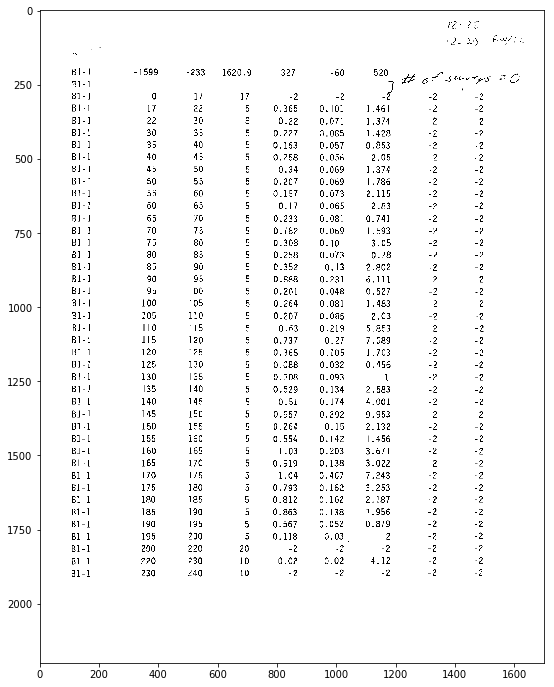

In [16]:
from matplotlib.pyplot import imshow
from PIL import Image

import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

ax.imshow(images[1])

In [19]:
assay_table_str = pytesseract.image_to_string(images[1])

In [20]:
print(assay_table_str)

12. 194 00 FW Pa

EL} 1599 233 - 1620.9 327 60 5203 #4 G/Jw/wryd’ z C
B1-1 0 17 17 -2 -2 -2 -2 -2
a 17 22 5 0.365 0.101 1.461 -2 -2
B1-1 22 30 8 0.22 0.071 1.374 -2 -2
B1-1 30 35 5 0.227 0.085 1.428 -2 -2
B1-1 35 40 5 0.163 0.057 0.853 -2 ~2
B1-1 40 45 5 0.258 0.056 2.05 -2 -2
B1-1 45 50 5 0.34 0.069 1.374 ~2 -2
B1-1 50 55 5 0.207 0.069 1.786 -2 -2
B1-1 55 60 5 0.157 0.073 2.115 -2 ~2
B1-1 60 65 5 0.17 0.065 2.83 -2 -2
B1-1 65 70 5 0.233 0.081 0.741 -2 -2
B1-1 70 75 5 0.182 0.069 1.593 -2 -2
B1-1 75 80 5 0.308 0.101 3.05 -2 -2
B1-1 80 85 5 0.258 0.073 0.78 -2 -2
B1-1 85 90 5 0.352 0.13 2.802 -2 -2
B1-1 90 95 5 0.888 0.231 6.111 -2 -2
B1-1 95 100 5 0.201 0.048 0.527 -2 -2
B1-1 100 105 5 0.264 0.081 1.483 -2 -2
B1-1 105 110 5 0.207 0.085 2.03 -2 -2
B1-1 110 115 5 0.63 0.219 5.853 -2 -2
B1-1 115 120 5 0.737 0.27 7.089 ~2 -2
B1-1 120 125 5 0.365 0.105 1.703 -2 -2
B1-1 125 130 5 0.088 0.032 0.456 -2 -2
i 130 135 5 0.308 0.093 1 -2 -2
B1-1 135 140 5 0.529 0.134 2.583 -2 -2
B1-1 140 145 5 0.5

In [24]:
assay_table_str.split('\n')
assay_table_arr = [line.split() for line in assay_table_str.split('\n')]

In [25]:
assay_table_arr

[['12.', '194', '00', 'FW', 'Pa'],
 [],
 ['EL}',
  '1599',
  '233',
  '-',
  '1620.9',
  '327',
  '60',
  '5203',
  '#4',
  'G/Jw/wryd’',
  'z',
  'C'],
 ['B1-1', '0', '17', '17', '-2', '-2', '-2', '-2', '-2'],
 ['a', '17', '22', '5', '0.365', '0.101', '1.461', '-2', '-2'],
 ['B1-1', '22', '30', '8', '0.22', '0.071', '1.374', '-2', '-2'],
 ['B1-1', '30', '35', '5', '0.227', '0.085', '1.428', '-2', '-2'],
 ['B1-1', '35', '40', '5', '0.163', '0.057', '0.853', '-2', '~2'],
 ['B1-1', '40', '45', '5', '0.258', '0.056', '2.05', '-2', '-2'],
 ['B1-1', '45', '50', '5', '0.34', '0.069', '1.374', '~2', '-2'],
 ['B1-1', '50', '55', '5', '0.207', '0.069', '1.786', '-2', '-2'],
 ['B1-1', '55', '60', '5', '0.157', '0.073', '2.115', '-2', '~2'],
 ['B1-1', '60', '65', '5', '0.17', '0.065', '2.83', '-2', '-2'],
 ['B1-1', '65', '70', '5', '0.233', '0.081', '0.741', '-2', '-2'],
 ['B1-1', '70', '75', '5', '0.182', '0.069', '1.593', '-2', '-2'],
 ['B1-1', '75', '80', '5', '0.308', '0.101', '3.05', '-2', '

In [26]:
headers = ['Hole', 'From', 'To', 'Length', 'Cu', 'Ni', 'S', 'Fe', 'Unk']

assay_df_list = []

for assay in assay_table_arr:
    if len(assay) == 9:
        assay_df_list.append(dict(zip(headers,assay)))


In [36]:
import pandas as pd
import numpy as np

assay_df = pd.DataFrame(assay_df_list)
assay_df.replace({'-2':np.nan}, inplace=True)

In [38]:
assay_df.Cu = assay_df.Cu.astype('float')

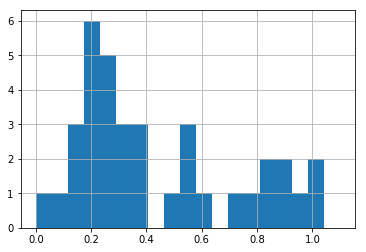

In [41]:
assay_df.Cu.hist(bins=np.linspace(0,1.1,20))